# FE 520 Final Project
**Instructor**: Parisa Golbayani   
**Group members**: Yujie Jin, Yuqi Liu  
**Date**: Dec 6, 2017

**Description**: Since solar energy industry has been popular recent years, we are aiming to analyze the stock prices and compound returns of two companies from solar energy industry (First Solar, Inc.(FSLR) and SunPower Corporation (SPWR)) and its upstream company (Silicon Laboratories Inc.(SLAB)) in past three years. 

**Data**: 2014/1/1 - 2016-12-31 Stock price of FSLR, FSLR, and SLAB from Yahoo Finance

**Expected Output**: Plots of stock price and return, Candlestick Charts with Moving Averages of return, ARIMA time series modeling, Monte-Carlo Simulation.

**Python packages**: Pandas, numpy, pandas_datareader, matplotlib, datetime, math, statsmodels.tsa.arima_model


**Reference**: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
https://finance.yahoo.com/

## Import Package:

In [1]:
import pandas as pd
import numpy as np
#Note: We need install Package "pandas_datareader" throught Anaconda-Environments
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from matplotlib.finance import candlestick_ohlc
import datetime
date_start = datetime.datetime(2014, 1, 1)
date_end = datetime.datetime(2016, 12, 13)

C:\Users\liuyu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## Download Data:

In [2]:
FSLR = pdr.get_data_yahoo(symbols='FSLR', start=date_start, end=date_end)
FSLR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,54.279999,57.580002,54.009998,57.439999,57.439999,5404200
2014-01-03,57.590000,58.299999,55.849998,56.740002,56.740002,4118700
2014-01-06,54.250000,54.630001,51.009998,51.259998,51.259998,11791700
2014-01-07,52.150002,53.889999,52.060001,52.490002,52.490002,6661900
2014-01-08,52.290001,52.889999,51.410000,51.680000,51.680000,4930200


In [4]:
SPWR = pdr.get_data_yahoo(symbols='SPWR', start=date_start, end=date_end)
SPWR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,29.530001,32.349998,29.059999,32.299999,32.299999,4420400
2014-01-03,32.950001,33.240002,31.650000,32.730000,32.730000,3332600
2014-01-06,33.060001,33.450001,32.119999,32.439999,32.439999,3337900
2014-01-07,32.820000,33.930000,32.279999,32.730000,32.730000,3767600
2014-01-08,32.520000,33.570000,32.400002,33.029999,33.029999,2097000


In [5]:
SLAB = pdr.get_data_yahoo(symbols='SLAB', start=date_start, end=date_end)
SLAB.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,43.209999,43.209999,41.189999,41.939999,41.939999,585500
2014-01-03,42.060001,42.730000,41.889999,42.459999,42.459999,196700
2014-01-06,42.580002,42.830002,42.130001,42.389999,42.389999,264900
2014-01-07,42.549999,42.790001,42.130001,42.490002,42.490002,215100
2014-01-08,42.400002,42.759998,42.160000,42.619999,42.619999,217600


## Plot adjusted close price of FSLR, SPWR, SLAB:

Populating the interactive namespace from numpy and matplotlib


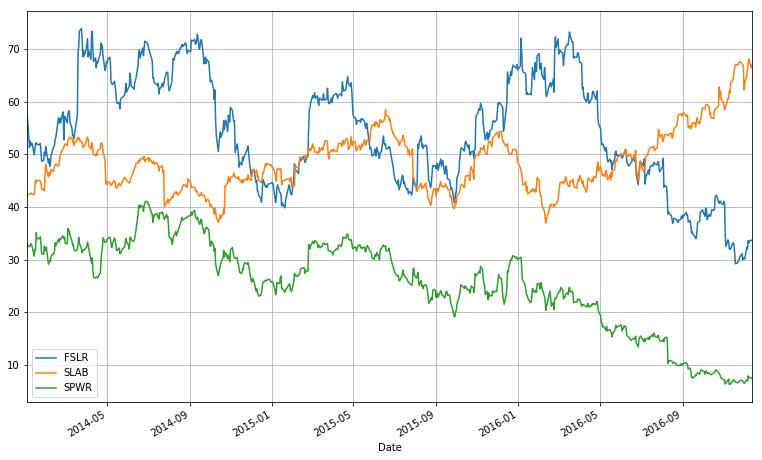

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 8)

stocks = pd.DataFrame({ "FSLR": FSLR["Adj Close"],
                        "SPWR": SPWR["Adj Close"],
                        "SLAB": SLAB["Adj Close"]})

stocks.plot(secondary_y = ["CSUNY"], grid = True)

## Calculate and plot return:

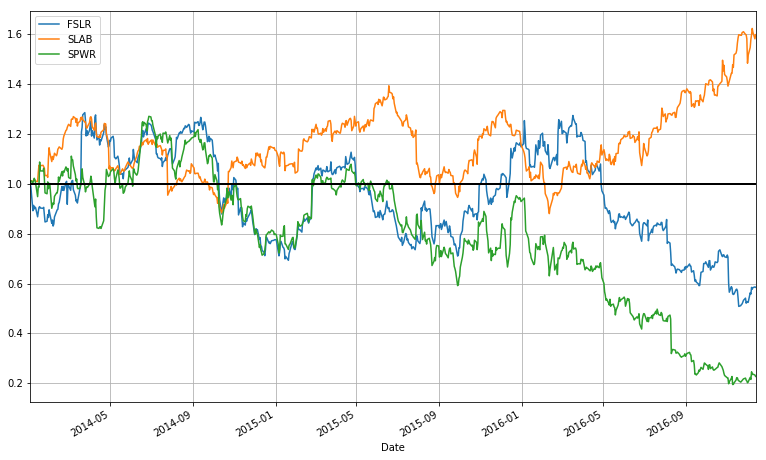

In [7]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.show()

## Candlestick Chart with Moving Averages:

In [8]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

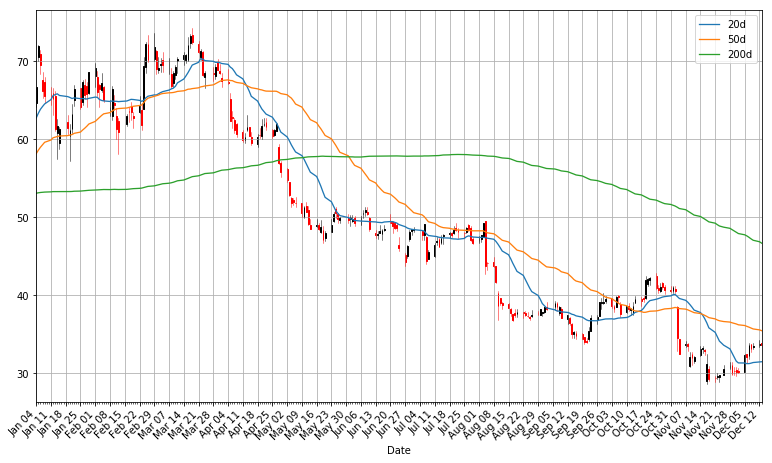

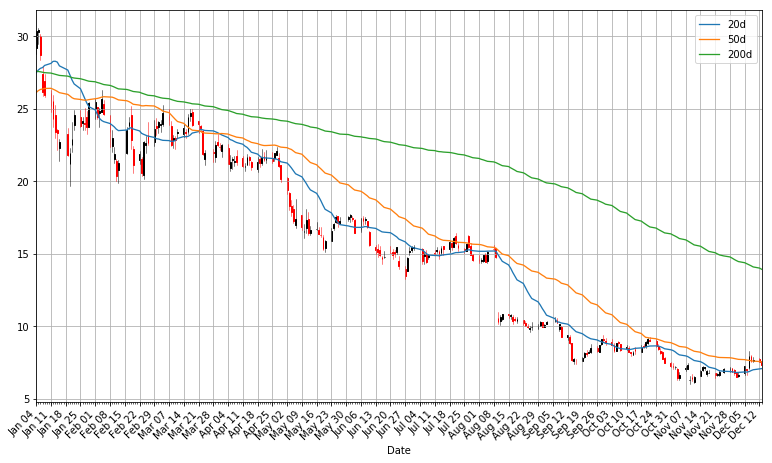

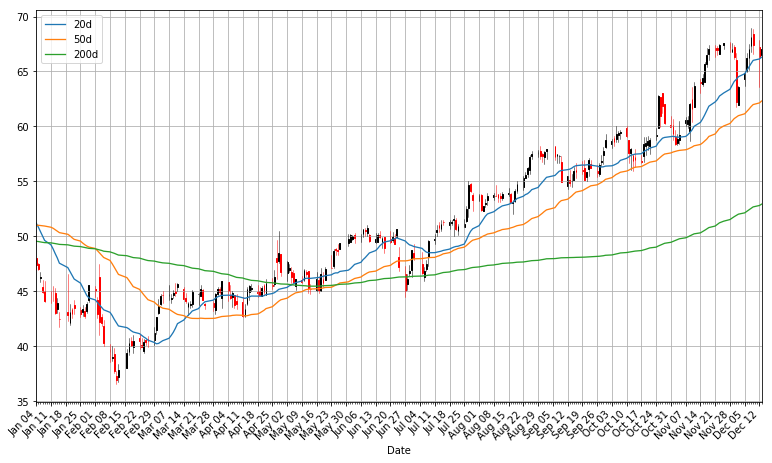

In [9]:
FSLR["20d"] = np.round(FSLR["Close"].rolling(window = 20, center = False).mean(), 2)
FSLR["50d"] = np.round(FSLR["Close"].rolling(window = 50, center = False).mean(), 2)
FSLR["200d"] = np.round(FSLR["Close"].rolling(window = 200, center = False).mean(), 2)
pandas_candlestick_ohlc(FSLR.loc['2016-01-01':,:], otherseries = ["20d", "50d", "200d"])

SPWR ["20d"] = np.round(SPWR ["Close"].rolling(window = 20, center = False).mean(), 2)
SPWR ["50d"] = np.round(SPWR ["Close"].rolling(window = 50, center = False).mean(), 2)
SPWR ["200d"] = np.round(SPWR ["Close"].rolling(window = 200, center = False).mean(), 2)
pandas_candlestick_ohlc(SPWR .loc['2016-01-01':,:], otherseries = ["20d", "50d", "200d"])

SLAB ["20d"] = np.round(SLAB  ["Close"].rolling(window = 20, center = False).mean(), 2)
SLAB ["50d"] = np.round(SLAB  ["Close"].rolling(window = 50, center = False).mean(), 2)
SLAB ["200d"] = np.round(SLAB  ["Close"].rolling(window = 200, center = False).mean(), 2)
pandas_candlestick_ohlc(SLAB .loc['2016-01-01':,:], otherseries = ["20d", "50d", "200d"])

## Fit time series ARIMA model and summarise residual:

C:\Users\liuyu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                              ARMA Model Results                              
Dep. Variable:                   FSLR   No. Observations:                  744
Model:                     ARMA(2, 1)   Log Likelihood                1623.904
Method:                       css-mle   S.D. of innovations              0.027
Date:                Wed, 06 Dec 2017   AIC                          -3237.807
Time:                        12:26:56   BIC                          -3214.747
Sample:                    01-02-2014   HQIC                         -3228.918
                         - 12-13-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9161      0.085     10.759      0.000       0.749       1.083
ar.L1.FSLR     1.6050      0.332      4.827      0.000       0.953       2.257
ar.L2.FSLR    -0.6095      0.329     -1.852      0.0

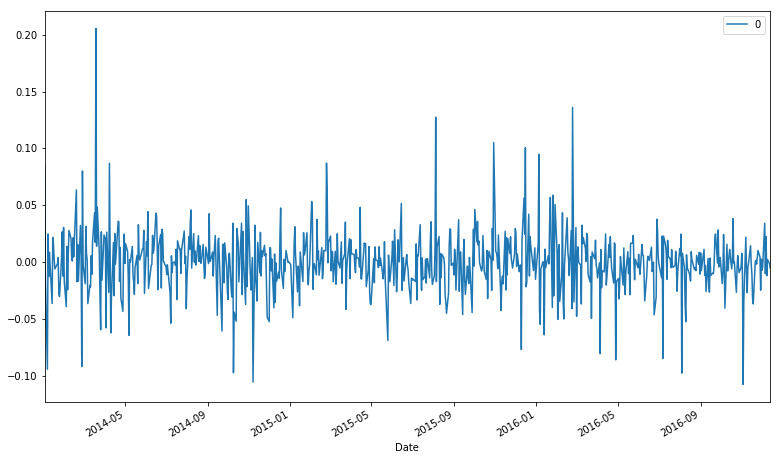

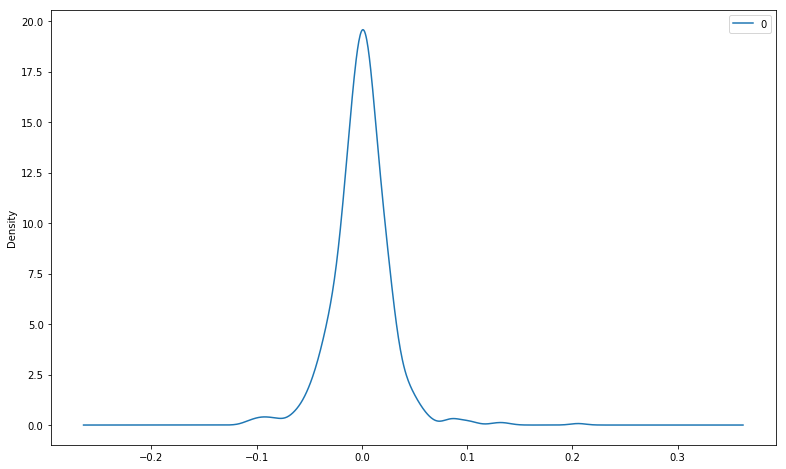

                0
count  744.000000
mean    -0.000100
std      0.027396
min     -0.107747
25%     -0.012905
50%      0.000259
75%      0.013156
max      0.205536


In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(stock_return.take([0], axis=1), order=(2,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


                              ARMA Model Results                              
Dep. Variable:                   SLAB   No. Observations:                  744
Model:                     ARMA(2, 0)   Log Likelihood                1790.235
Method:                       css-mle   S.D. of innovations              0.022
Date:                Wed, 06 Dec 2017   AIC                          -3572.470
Time:                        12:18:46   BIC                          -3554.022
Sample:                    01-02-2014   HQIC                         -3565.359
                         - 12-13-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2017      0.101     11.924      0.000       1.004       1.399
ar.L1.SLAB     0.9659      0.037     26.366      0.000       0.894       1.038
ar.L2.SLAB     0.0272      0.037      0.740      0.4

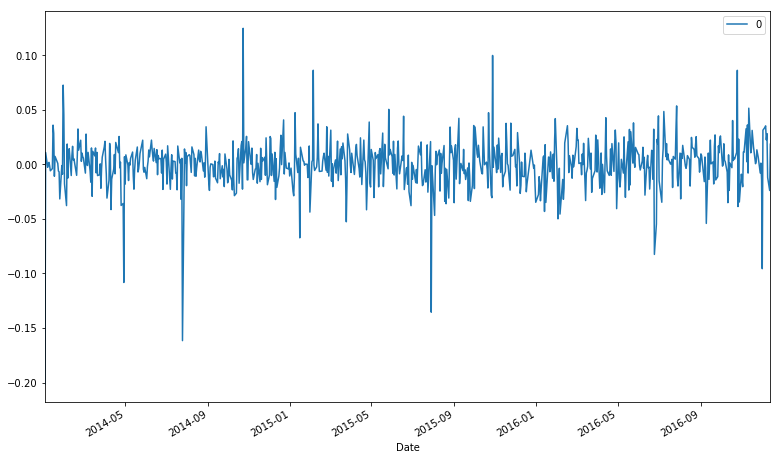

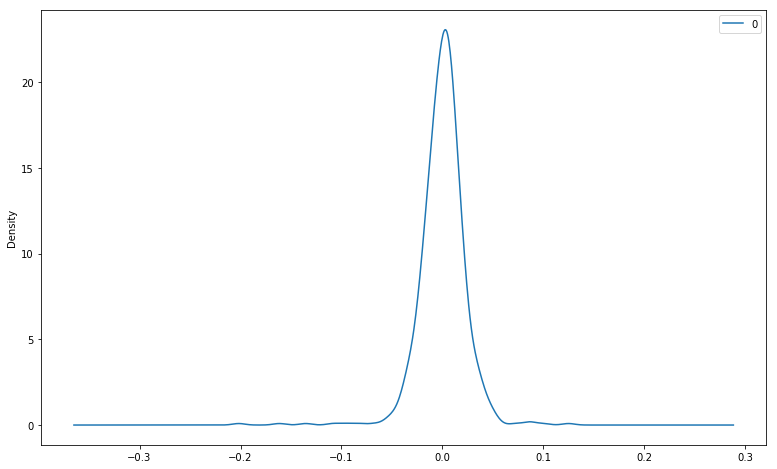

                0
count  744.000000
mean     0.000284
std      0.022972
min     -0.201712
25%     -0.010271
50%      0.001290
75%      0.011090
max      0.124834


In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(stock_return.take([1], axis=1), order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


                              ARMA Model Results                              
Dep. Variable:                   SPWR   No. Observations:                  744
Model:                     ARMA(1, 0)   Log Likelihood                1670.453
Method:                       css-mle   S.D. of innovations              0.026
Date:                Wed, 06 Dec 2017   AIC                          -3334.905
Time:                        12:18:47   BIC                          -3321.069
Sample:                    01-02-2014   HQIC                         -3329.572
                         - 12-13-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7103      0.220      3.224      0.001       0.279       1.142
ar.L1.SPWR     0.9968      0.003    366.674      0.000       0.991       1.002
                                    Roots           

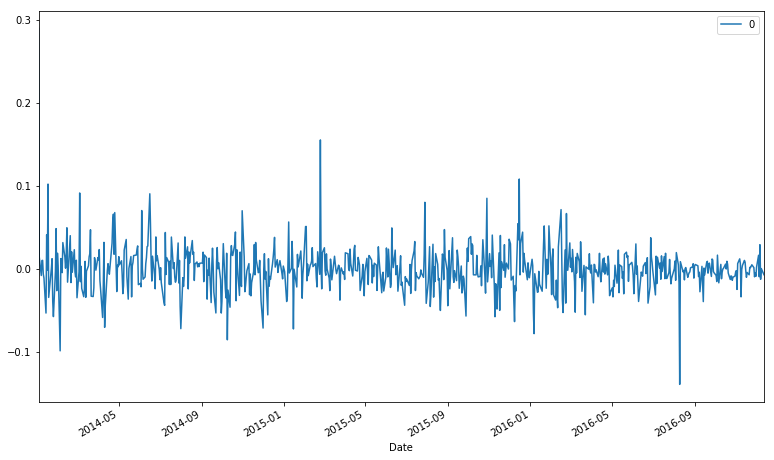

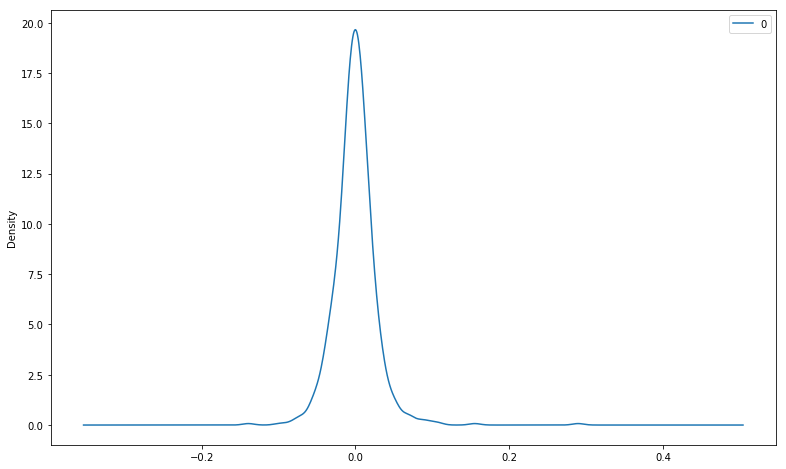

                0
count  744.000000
mean    -0.000388
std      0.027662
min     -0.139193
25%     -0.013275
50%     -0.000479
75%      0.012446
max      0.289726


In [11]:
from statsmodels.tsa.arima_model import ARIMA
#set up model parameters
model = ARIMA(stock_return.take([2], axis=1), order=(1,0,0))
#fit model with data
model_fit = model.fit(disp=0)
print(model_fit.summary())

#store model residual into a table (dataframe)
residuals = pd.DataFrame(model_fit.resid)
#draw data in this table 
residuals.plot()
#make the plot visible
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


## Monte-Carlo Simulation:

European results (FSLR)= 1.48517625086


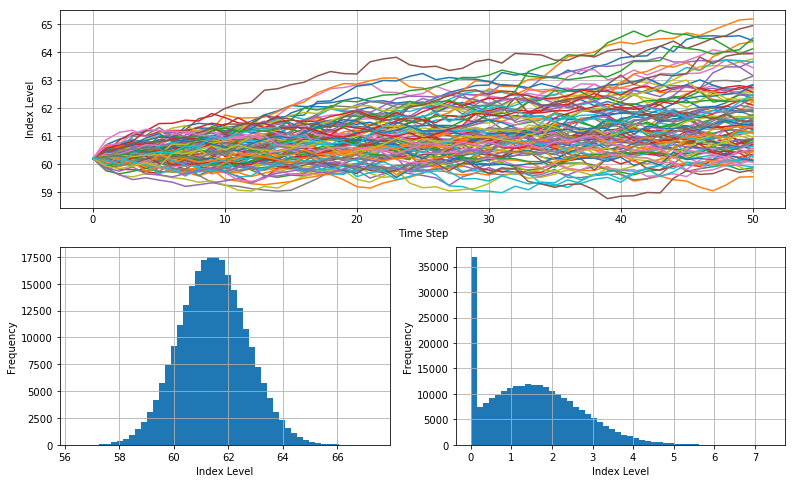

In [12]:
import math as mh
from time import time
np.random.seed(20000)
t0=time()
S0=60.2
K=60
T=1.0
r=0.02
sigma=0.02
M=50
dt=T/M
I=250000

S=S0*np.exp(np.cumsum((r-0.5*sigma**2)*dt+sigma*mh.sqrt(dt)*np.random.standard_normal((M+1,I)),axis=0))
S[0]=S0
#payoff present
C0=mh.exp(-r*T)*sum(np.maximum(S[-1]-K,0))/I
print("European results (FSLR)=",C0)

plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,1,1)
#所有行 前200列
plt.plot(S[:,:100])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Index Level')

plt.subplot(2,2,3)
plt.hist(S[-1],bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(np.maximum(S[-1]-K,0),bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.show()

European results (SPWR)= 0.159993577439


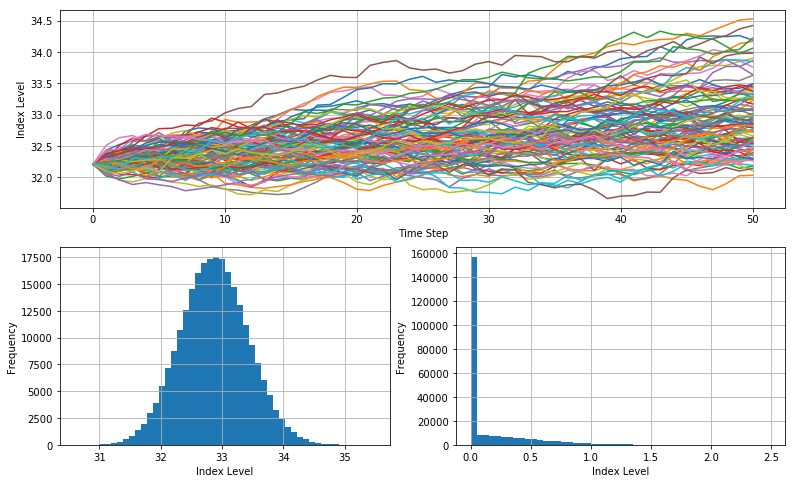

In [13]:
import math as mh
from time import time

np.random.seed(20000)
t0=time()
S0=32.21
K=33
T=1.0
r=0.02
sigma=0.01661
M=50
dt=T/M
I=250000

S=S0*np.exp(np.cumsum((r-0.5*sigma**2)*dt+sigma*mh.sqrt(dt)*np.random.standard_normal((M+1,I)),axis=0))
S[0]=S0

C0=mh.exp(-r*T)*sum(np.maximum(S[-1]-K,0))/I
print("European results (SPWR)=",C0)

plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,1,1)
plt.plot(S[:,:100])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Index Level')

plt.subplot(2,2,3)
plt.hist(S[-1],bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(np.maximum(S[-1]-K,0),bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.show()

European results (SLAB)= 2.66044515334


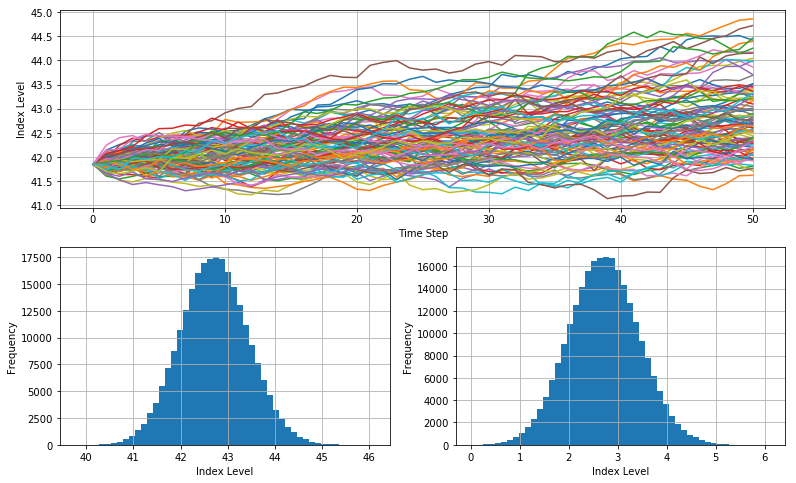

In [14]:
import math as mh
from time import time

np.random.seed(20000)
t0=time()
S0=41.85
K=40
T=1.0
r=0.02
sigma=0.01661
M=50
dt=T/M
I=250000

S=S0*np.exp(np.cumsum((r-0.5*sigma**2)*dt+sigma*mh.sqrt(dt)*np.random.standard_normal((M+1,I)),axis=0))
S[0]=S0

C0=mh.exp(-r*T)*sum(np.maximum(S[-1]-K,0))/I
print("European results (SLAB)=",C0)

plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,1,1)
plt.plot(S[:,:100])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Index Level')

plt.subplot(2,2,3)
plt.hist(S[-1],bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(np.maximum(S[-1]-K,0),bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.show()